# Ch.05 業務要件と処理パターン

## 5.5 顧客層に応じた販売戦略（クラスタリング、次元圧縮）

- 顧客層に応じた販売戦略
  - 教師なし
  - クラスタリング
  - 次元圧縮
  - クラスタリングと次元圧縮の組み合わせ

In [1]:
# 共通事前処理

# 余分なワーニングを非表示にする
from IPython.display import display
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport

# matplotlib日本語化対応

# データフレーム表示用関数

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns", None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
RANDOM_SEED = 123

### 5.5.1 処理パターンと想定される業務利用シーン

### 5.5.2 例題のデータ説明とユースケース

- CHANNEL: 販売チャンネル
  - 「ホテル/レストラン/カフェ」「小売」
- REGION: 地域
  - 「リスボン」「オポルト（ポルト）」「その他」
- FRESH: 生鮮食品
- MILK: 乳製品
- GROCERY: 食料品
- FROZEN: 冷凍製品
- DETERGENTS_PAPER: 洗剤・紙製品
- DELICATESSEN: 総裁

### 5.5.3 モデルの概要

- クラスタリング
  - 教師なし学習
- 分類
  - 教師あり学習

### 5.5.4 データ読み込みからデータ確認まで

データ読み込み

In [2]:
# データ読み込み
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(url)

# 日本語に変更
columns = [
    '販売チャネル', '地域', '生鮮食品', '乳製品', '食料品',
    '冷凍食品', '洗剤_紙製品', '総菜'
]
df.columns = columns

データ確認

In [3]:
# データ内容確認
display(df.head())

# サイズ確認
print(df.shape)

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [4]:
# 欠損値確認
print(df.isnull().sum())

販売チャネル    0
地域        0
生鮮食品      0
乳製品       0
食料品       0
冷凍食品      0
洗剤_紙製品    0
総菜        0
dtype: int64


In [5]:
# 販売チャネルのコード値確認
print(df['販売チャネル'].value_counts())
print()

# 地域のコード値確認
print(df['地域'].value_counts())

1    298
2    142
Name: 販売チャネル, dtype: int64

3    316
1     77
2     47
Name: 地域, dtype: int64


- 販売チャネルのコード値の意味
  - 1: Horeca(ホテル・レストラン・カフェ) 298
  - 2: Retail(小売り) 142
- 地域のコード値の意味
  - 1: Lisbon(リスボン) 77
  - 2: Oporto(オプルトまたはポルト) 47
  - 3: Other Region(その他) 316

ヒストグラム表示

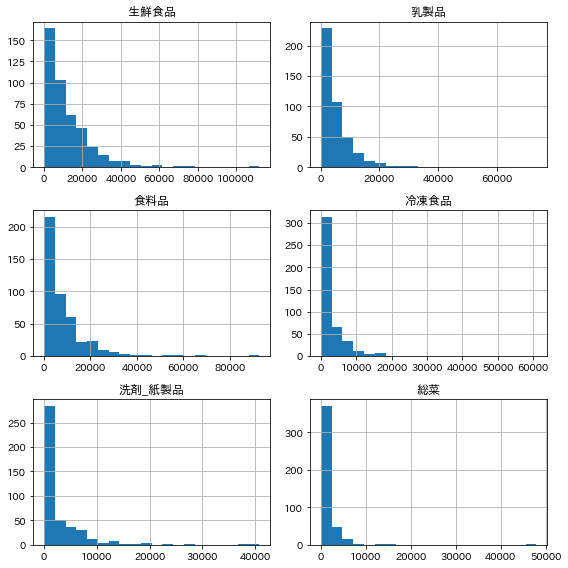

In [7]:
# 販売チャネルと地域を落としたデータを作る
from pylab import rcParams

df2 = df.drop(['販売チャネル', '地域'], axis=1)

# 分析対象項目のヒストグラム表示
rcParams['figure.figsize'] = (8, 8)
df2.hist(bins=20)
plt.tight_layout()
plt.show()

### 5.5.5 クラスタリングの実施

In [8]:
# データ前処理とデータ分割は不要

# アルゴリズムの選択
from sklearn.cluster import KMeans

# グループ数を定義
clusters = 4

# アルゴリズムの定義
algorithm = KMeans(
    n_clusters=clusters, random_state=RANDOM_SEED)

In [9]:
# 学習、予測の実施
y_pred = algorithm.fit_predict(df2)

# 結果の一部確認
print(y_pred[:20])

[1 2 1 1 0 1 1 1 1 2 2 1 0 2 0 1 2 1 1 1]


### 5.5.6 クラスタリング結果の分析

グループ別の平均値を計算

In [10]:
# グループごとの平均値計算
df_cluster = df2.groupby(y_pred).mean()
display(df_cluster)

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,36144.4828,5471.4655,6128.7931,6298.6552,1064.0000,2316.7241
1,9087.4638,3027.4275,3753.5145,2817.9855,1003.0036,1040.5254
2,4808.8421,10525.0105,16909.7895,1462.5895,7302.4000,1650.8842
3,19888.2727,36142.3636,45517.4545,6328.9091,21417.0909,8414.0000


グループ別のグラフ表示

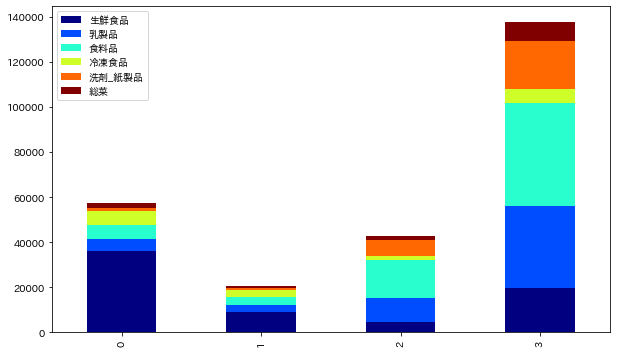

In [11]:
# グループ別の棒グラフ表示
df_cluster.plot(
    kind='bar', stacked=True, figsize=(10, 6), colormap='jet'
)
plt.show()

グループと販売チャネル・地域との関係

==== グループ0 ====


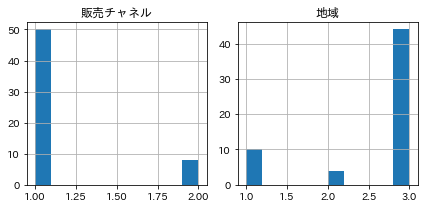

==== グループ1 ====


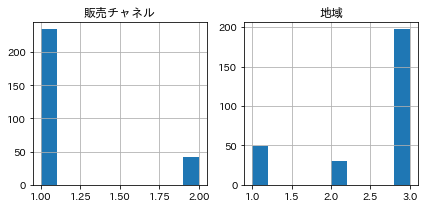

==== グループ2 ====


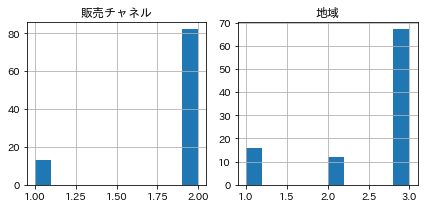

==== グループ3 ====


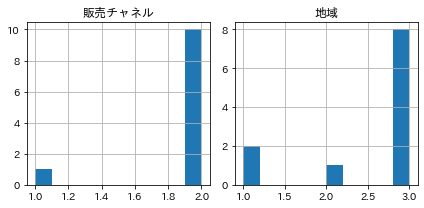

In [12]:
# クラスタと、チャネル・地域の関係を調べる

# 販売チャネルと地域のみをdf3に抽出
df3 = df[['販売チャネル', '地域']]

# グラフの大きさ設定
rcParams['figure.figsize'] = (6, 3)

# グループごとのグラフ表示
for i in range(clusters):
    fig, ax = plt.subplots()
    w = df3[y_pred == i]
    print(f'==== グループ{i} ====')
    w.hist(ax=ax)
    plt.tight_layout()
    plt.show()

### 5.5.7 次元圧縮の実施

In [13]:
# アルゴリズムの選択
from sklearn.decomposition import PCA

# モデル生成
# 散布図表示が目的のため2次元に圧縮
pca = PCA(n_components=2)

In [14]:
# 学習・変換の実施
d2 = pca.fit_transform(df2)

# 結果の一部表示
print(d2[:5, :])

[[  650.0221  1585.5191]
 [-4426.805   4042.4515]
 [-4841.9987  2578.7622]
 [  990.3464 -6279.806 ]
 [10657.9987 -2159.7258]]


### 5.5.8 次元圧縮の活用方法

散布図表示

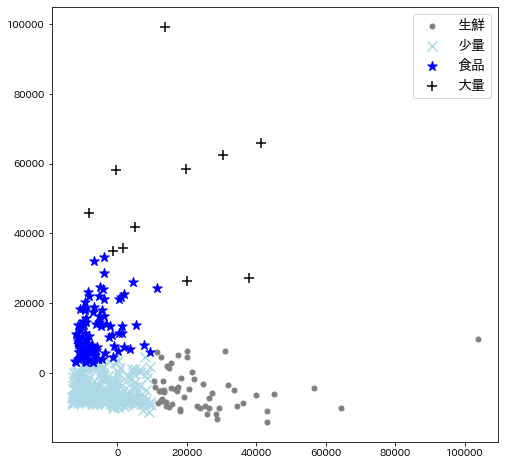

In [16]:
# グループごとに色分けし散布図表示

plt.figure(figsize=(8, 8))
marks = ['.', 'x', '*', '+']
labels = ['生鮮', '少量','食品', '大量']
colors = ['grey', 'lightblue', 'blue', 'black']
for i in range(clusters):
    plt.scatter(
        d2[y_pred == i][:, 0], d2[y_pred == i][:, 1],
        marker=marks[i], label=labels[i], s=100, c=colors[i]
    )
plt.legend(fontsize=14)
plt.show()

例外値の調査

In [17]:
# 生鮮グループの例外値を調べる
display(df[d2[:, 0] > 100000])

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
181,1,3,112151,29627,18148,16745,4948,8550


【考察】

インデックス181の顧客は、特に生鮮食品の購買量が多いと考えられる

In [18]:
# 大量グループの例外値を調べる
display(df[d2[:, 1] > 80000])

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
85,2,3,16117,46197,92780,1026,40827,2944


【考察】

インデックス85の顧客は、特に食料品と洗剤・紙製品の購買量が多いと考えられる

In [19]:
# 統計情報確認
display(df2.describe())

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
count,440.0000,440.0000,440.0000,440.0000,440.0000,440.0000
mean,12000.2977,5796.2659,7951.2773,3071.9318,2881.4932,1524.8705
std,12647.3289,7380.3772,9503.1628,4854.6733,4767.8544,2820.1059
min,3.0000,55.0000,3.0000,25.0000,3.0000,3.0000
25%,3127.7500,1533.0000,2153.0000,742.2500,256.7500,408.2500
50%,8504.0000,3627.0000,4755.5000,1526.0000,816.5000,965.5000
75%,16933.7500,7190.2500,10655.7500,3554.2500,3922.0000,1820.2500
max,112151.0000,73498.0000,92780.0000,60869.0000,40827.0000,47943.0000
